# Predicția complexității cuvintelor - Învățare statistică

Complexitatea unui cuvânt este un criteriu subiectiv și depinde de mulți factori de la cât de des este întâlnit în vorbire acel cuvânt, cât de lung sau greu de citit este, dacă este un termen specializat, forma morfologică, până la funcția cuvântului în sintaxa propoziției. Pe baza acestor idei putem să ne definim niște funcții care să extragă caracterisitici.


Aveți voie cu următoarele resurse externe, cu condiția să primiți aprobare de la Sergiu (aprobările se dau individual):
- liste de cuvinte adiționale, [MRC Psycholinguistic Database](https://websites.psychology.uwa.edu.au/school/MRCDatabase/uwa_mrc.htm) conține informații privitoare la cuvinte sau lista [Dale-Chall](https://readabilityformulas.com/word-lists/the-dale-chall-word-list-for-readability-formulas/)
- seturi de date de text adiționale din care să extrageți frecvențe, de exemplu [AOCHILDES](https://github.com/UIUCLearningLanguageLab/AOCHILDES) conține ”child-directed speech transcripts, ordered by the age of the target child” pentru engleză iar Task-ul [BabyLM](https://babylm.github.io/) are ca scop antrenarea de LLM cu texte care pot fi plauzibile în dezvoltarea copiilor
- biblioteci sau API care să comunice cu [WordNet](http://wordnetweb.princeton.edu/perl/webwn?s=dog) sau [ConceptNet](https://conceptnet.io/)
- algoritmi traducere automată (ideal ar fi să ruleze local)
- rețele pre-antrenate de tip BERT, RoBERTa, XLM-RoBERTa (obligatoriu trebuie să ruleze local) din care să scoateți vectori de activări sau valori interne, word embeddings
- LLMs care obligatoriu trebuie să ruleze local din care puteți scoate vectori de activări sau valori interne din rețea


**Nu aveți voie cu:**
- API-uri externe
- extragerea scorurilor de complexitate prin parsarea unor prompturi rezultate din LLM, din LLM aveți voie doar cu valori interne ale vectorilor


## Sugestii de caracteristici

- frecvența cuvântului într-un corpus foarte mare - aici putem folosi biblioteca wordfreq, dar ideal să implementați o funcție care extrage cuvintele frecvente dintr-un corpus arbitrar
- lungimea cuvantului
- nr de silabe
- nr de vocale (aici sunt si semivocale, fara diftongi)
- daca e titlu sau entitate
- nr de synsets din WordNet
- nr de hypernime (colour is a hypernym of red)
- nr de hyponime (spoon is a hyponym of cutlery)
- word embedding din spacy
- nr de relații în arborele de sintaxă al propoziției
- cuvinte și părți de vorbire din context

## Get data

- comment data download if running on kaggle

In [1]:
! mkdir -p ../input/predictia-complexitatii-cuvintelor
! cd ../input/predictia-complexitatii-cuvintelor && wget https://github.com/curs-ia-2024/proiect/releases/download/data/train.csv && wget https://github.com/curs-ia-2024/proiect/releases/download/data/test.csv

The syntax of the command is incorrect.
'wget' is not recognized as an internal or external command,
operable program or batch file.


## Load Data, Make a Random Submission

In [2]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input\predictia-complexitatii-cuvintelor\test.csv
../input\predictia-complexitatii-cuvintelor\train.csv


In [3]:
! pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import os
BASE_DIR = '../input/predictia-complexitatii-cuvintelor'
TRAIN_PATH = os.path.join(BASE_DIR, 'train.csv')
TEST_PATH = os.path.join(BASE_DIR, 'test.csv')

In [5]:
import pandas as pd

train = pd.read_csv(TRAIN_PATH)
train

,cur_id,language,sentence,word,complexity
0,0,english,"Behold, there came up out of the river seven c...",river,0.000000
1,1,english,I am a fellow bondservant with you and with yo...,brothers,0.000000
2,2,english,"The man, the lord of the land, said to us, 'By...",brothers,0.050000
3,3,english,Shimei had sixteen sons and six daughters; but...,brothers,0.150000
4,4,english,Moreover Yahweh will deliver Israel also with ...,sons,0.160714
...,...,...,...,...,...
8628,8628,spanish,Pueden estar colmados de desbarajustes y el bi...,colmados,0.675000
8629,8629,spanish,Pueden estar colmados de desbarajustes y el bi...,desbarajustes,0.800000
8630,8630,spanish,Y le va a presentar algunos retos personales p...,esperaría,0.200000
8631,8631,spanish,Y le va a presentar algunos retos personales p...,retos,0.450000


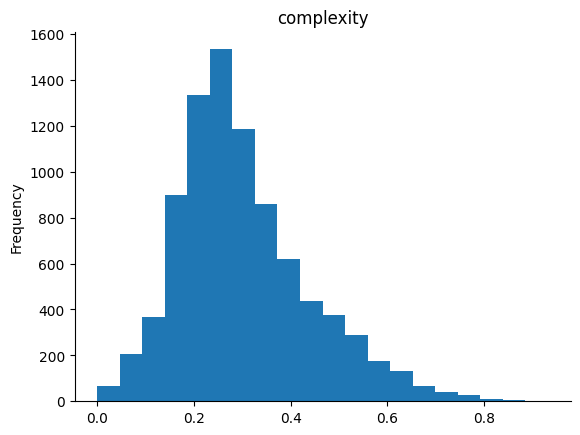

In [6]:
# @title complexity

from matplotlib import pyplot as plt
train['complexity'].plot(kind='hist', bins=20, title='complexity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
test = pd.read_csv(TEST_PATH)
test

,cur_id,language,sentence,word
0,8633,catalan,En el que han coincidit tots els presents és q...,coincidit
1,8634,catalan,"Serà molt més fàcil poder-nos comunicar, ha ce...",auditiva
2,8635,catalan,"El Síndic de Greuges, Rafael Ribó, ha reclamat...",segregació
3,8636,catalan,També demana elaborar materials didàctics per ...,controvertits
4,8637,catalan,Una quinzena de joves han clavat enganxines on...,enganxines
...,...,...,...,...
5618,14251,spanish,"La función de concentración de recursos, tiene...",concentración
5619,14252,spanish,Después surgió la moneda y posteriormente surg...,intercambios
5620,14253,spanish,A éstos se les coloca una fecha posterior al m...,suficientes
5621,14254,spanish,Colisión: Choque de dos cuerpos. Oposición y p...,ahorro


In [8]:
import numpy as np
import pandas as pd

random_values = np.random.uniform(0, 1, len(test))
random_submission = pd.DataFrame({'cur_id': test.cur_id.values, 'complexity': random_values})
random_submission.to_csv('submission.csv', index=False)

## Exploratory Data Analysis

In [9]:
import plotly.express as px
import pandas as pd

def plot_hist(df, criterion='language'):
    fig = px.histogram(df, x='complexity', color=criterion, marginal='rug', nbins=20, barmode='overlay',
                       title=f'Density Plot of Complexity by {criterion}',
                       labels={'complexity': 'Complexity', criterion: 'Language', 'count': 'Density'})
    fig.show()

In [10]:
# plot_hist(train)

In [11]:
train.groupby('language')['complexity'].describe()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
catalan,30.0,0.486667,0.125212,0.175,0.425000,0.475000,0.600000,0.700000
english,8363.0,0.301132,0.133718,0.000,0.210526,0.277778,0.368421,0.931818
filipino,30.0,0.170833,0.125959,0.025,0.050000,0.150000,0.250000,0.475000
french,30.0,0.370833,0.229231,0.000,0.168750,0.350000,0.525000,0.800000
german,30.0,0.413333,0.191042,0.150,0.256250,0.362500,0.550000,0.875000
italian,30.0,0.247667,0.168189,0.030,0.085000,0.235000,0.417500,0.520000
japanese,30.0,0.259333,0.173044,0.020,0.090000,0.270000,0.380000,0.620000
portuguese,30.0,0.273000,0.164572,0.060,0.130000,0.245000,0.380000,0.580000
sinhala,30.0,0.243333,0.213966,0.050,0.090000,0.170000,0.327500,0.910000


In [12]:
test.groupby('language')['sentence'].count()

language
catalan       445
english       570
filipino      570
french        568
german        570
italian       570
japanese      570
portuguese    567
sinhala       600
spanish       593
Name: sentence, dtype: int64

In [13]:
train[train.language == 'english'].shape

(8363, 5)

In [14]:
test[test.language == 'english'].shape

(570, 4)

In [15]:
import nltk


nltk.download('punkt')

def tokenize(text):
    return nltk.tokenize.word_tokenize(text)

tokenize(train.iloc[-1].sentence)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ilieo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Y',
 'le',
 'va',
 'a',
 'presentar',
 'algunos',
 'retos',
 'personales',
 'pero',
 'no',
 'es',
 'ese',
 'escenario',
 'lúgubre',
 'que',
 'tal',
 'vez',
 'esperaría',
 '.']

In [16]:
from tqdm import tqdm
from collections import Counter

all_tokens = []
for sentence in tqdm(train.sentence.values):
    all_tokens.extend(tokenize(sentence))

for sentence in tqdm(test.sentence.values):
    all_tokens.extend(tokenize(sentence))


100%|██████████| 5623/5623 [00:00<00:00, 6164.31it/s]


In [17]:
counts = Counter(all_tokens)
counts.most_common(100)



[(',', 23989),
 ('the', 17415),
 ('.', 12470),
 ('of', 11464),
 ('and', 9229),
 ('in', 6362),
 ('to', 6114),
 ('a', 5243),
 ('de', 3307),
 ('that', 2857),
 ('on', 2661),
 ('for', 2506),
 ('is', 2480),
 ('(', 2217),
 (')', 2130),
 ('la', 1853),
 ('que', 1838),
 ('with', 1826),
 (';', 1698),
 ('by', 1425),
 ('as', 1418),
 ('e', 1362),
 ('be', 1340),
 ('I', 1299),
 ('The', 1217),
 ('are', 1203),
 ('[', 1182),
 (']', 1174),
 ('this', 1167),
 ('have', 1151),
 (':', 1042),
 ('you', 992),
 ('which', 973),
 ('not', 959),
 ('it', 952),
 ('was', 943),
 ('from', 933),
 ('en', 899),
 ('at', 876),
 ('will', 862),
 ('o', 834),
 ('i', 825),
 ('an', 811),
 ('we', 809),
 ('el', 800),
 ('un', 773),
 ('has', 743),
 ('or', 722),
 ('all', 719),
 ('their', 709),
 ('les', 698),
 ('European', 693),
 ('y', 662),
 ('his', 648),
 ('und', 648),
 ('no', 641),
 ('di', 639),
 ('der', 621),
 ('-', 618),
 ('die', 609),
 ('``', 596),
 ('your', 595),
 ("''", 594),
 ('they', 583),
 ('who', 583),
 ('were', 581),
 ('et', 5

## Evaluation Metric

Custom lexical complexity prediction metric consisting in:
- `(max(0, R^2) + abs(pearson))/2`
- R^2 - is the standard regression metric, here we do not allow negative values
- pearson - is the pearson correlation

A good sollution would:
- have values that are close to the actual lexical complexity scores
- have values that are correlated well to the complexity scores
- one can obtain a good correlation with values that are outside of the range or inversely proportional, we don't care as much
- a constant predictor will get 0, pearson will be NaN


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import numpy as np

import warnings
warnings.filterwarnings("ignore", message="An input array is constant; the correlation coefficient is not defined.")


def pearson_r2(preds, y_true):
    """
    Custom lexical complexity prediction metric consisting in:
    - `(max(0, R^2) + abs(pearson))/2`
    - R^2 - is the standard regression metric, here we do not allow negative values
    - pearson - is the pearson correlation

    A good sollution would:
    - have values that are close to the actual lexical complexity scores
    - have values that are correlated well to the complexity scores
    - one can obtain a good correlation with values that are outside of the range or inversely proportional, we don't care as much
    - a constant predictor will get 0, pearson will be NaN

    """
    r2 = r2_score(y_true, preds, sample_weight=None, force_finite=True)
    r2 = max(0, r2)
    pears = pearsonr(y_true, preds)[0]
    pears = np.abs(np.nan_to_num(pears, 0))
    return (pears + r2)/2

def evaluate(predictions, y_true):
    cust = pearson_r2(predictions, y_true)
    return {'r2_pearson': cust}


### TODO:
- add more metrics
- create functions to evaluate individual metrics


## Train regression model and predict

In [19]:
! pip install wordfreq[cjk]


[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import wordfreq

lang_code = {
    "catalan": "ca",
    "german": "de",
    "english": "en",
    "spanish": "es",
    "filipino": "fil",
    "french": "fr",
    "italian": "it",
    "japanese": "ja",
    "portuguese": "pt",
    "sinhala": "si"
}

# TODO: make function to use wordfreq

In [21]:
import spacy
spacy_models = {
    "ca": "ca_core_news_sm",
    "de": "de_core_news_sm",
    "en": "en_core_web_sm",
    "es": "es_core_news_sm",
    "fr": "fr_core_news_sm",
    "it": "it_core_news_sm",
    "ja": "ja_core_news_sm",
    "pt": "pt_core_news_sm",
    # Note: Filipino and Sinhala may not have official spaCy models for NER
}

# Initialize a set to store all unique entity labels
all_unique_labels = set()

# Extract unique entity labels for each language
for language, code in lang_code.items():
    if code in spacy_models:
        print(f"Extracting entity labels for {language} ({code})...")
        try:
            nlp = spacy.load(spacy_models[code])
            labels = nlp.get_pipe("ner").labels
            all_unique_labels.update(labels)
           # print(f"Entity labels for {language} ({code}): {labels}\n")
        except Exception as e:
            print(f"Could not load model for {language} ({code}): {e}\n")
    else:
        print(f"No spaCy model found for {language} ({code})\n")

# Convert the set to a sorted list
all_unique_labels_list = sorted(list(all_unique_labels))

print("Comprehensive list of all unique entity labels:")
print(all_unique_labels_list) 

Extracting entity labels for catalan (ca)...
Extracting entity labels for german (de)...
Extracting entity labels for english (en)...
Extracting entity labels for spanish (es)...
No spaCy model found for filipino (fil)

Extracting entity labels for french (fr)...
Extracting entity labels for italian (it)...
Extracting entity labels for japanese (ja)...
Extracting entity labels for portuguese (pt)...
No spaCy model found for sinhala (si)

Comprehensive list of all unique entity labels:
['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MISC', 'MONEY', 'MOVEMENT', 'NORP', 'ORDINAL', 'ORG', 'PER', 'PERCENT', 'PERSON', 'PET_NAME', 'PHONE', 'PRODUCT', 'QUANTITY', 'TIME', 'TITLE_AFFIX', 'WORK_OF_ART']


In [22]:
nlp_models = {
    "catalan": spacy.load('es_core_news_lg'),
    "german": spacy.load('de_core_news_lg'),
    "english": spacy.load('en_core_web_lg'),
    "spanish": spacy.load('es_core_news_lg'),
    "filipino": spacy.load('en_core_web_lg'),
    "french": spacy.load('fr_core_news_lg'),
    "italian": spacy.load('it_core_news_lg'),
    "japanese": spacy.load('en_core_web_lg'),
    "portuguese": spacy.load('pt_core_news_lg'),
    "sinhala": spacy.load('en_core_web_lg')
}

In [24]:

from wordfreq import word_frequency
import spacy
import string
from textblob import TextBlob
from nltk.corpus import cmudict
import textstat
from nltk.corpus import wordnet as wn
import re

def clean_word(word):
    # Remove punctuation from the word
    translator = str.maketrans('', '', string.punctuation)
    return word.translate(translator)

def get_wd_len(word):
    """Basic function to return length
    """
    return len(word)

def count_vowels(word):
    vowels = "aeiouAEIOU"
    return sum(1 for char in word if char in vowels)

def count_consonants(word):
    consonants = "bcdfghjklmnpqrstvwxyzBCDFGHJKLMNPQRSTVWXYZ"
    return sum(1 for char in word if char in consonants)


def get_pos_for_word(target_word, doc):
    for token in doc:
        if token.text == target_word:
            return token.pos
    return None 

def get_frequency(word, language):
    """Basic function to return frequency from external corpus.
    """
    word_freq = word_frequency(word, lang_code[language])
    # TODO: make function to return frequency from counter
    return word_freq

def get_synsets_count(word):
     synsets_count = len(wn.synsets(word))
     return synsets_count

def get_synsets_depth(word):
    synset_depth = max([synset.min_depth() for synset in wn.synsets(word)], default=0)
    return synset_depth

def get_hypernyms_count(word):
    hypernyms_count = sum([len(synset.hypernyms()) for synset in wn.synsets(word)])
    return hypernyms_count

def get_hyponyms_count(word):
    return sum(len(synset.hyponyms()) for synset in wn.synsets(word))

def get_root_distance(word, sentence,doc):
    
    for token in doc:
        if clean_word(token.text.lower()) == clean_word(word.lower()):
            return len(list(token.ancestors))
    return -1 

def get_syllable_count(word):
    return textstat.syllable_count(word)

def get_capitalization_ratio(word):
    num_caps = sum(1 for char in word if char.isupper())
    return num_caps / len(word)

def get_frequency_of_lemma(word, language):
  if language in nlp_models:
      doc = nlp_models[language](word)
      lemma = doc[0].lemma_
      return word_frequency(lemma, lang_code[language], wordlist='best', minimum=0.0)
  return 0


def get_count_consecutive_consonants(word):
    consonants = "bcdfghjklmnpqrstvwxyzBCDFGHJKLMNPQRSTVWXYZ"
    count = 0
    
    for i in range(len(word) - 1):
        if word[i] in consonants and word[i+1] in consonants:
            count += 1
    
    return count

def levenshtein_distance(s1, s2):
    len_s1, len_s2 = len(s1), len(s2)
    
    dp = [[0] * (len_s2 + 1) for _ in range(len_s1 + 1)]
    
    for i in range(len_s1 + 1):
        dp[i][0] = i
    for j in range(len_s2 + 1):
        dp[0][j] = j
    
    for i in range(1, len_s1 + 1):
        for j in range(1, len_s2 + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            dp[i][j] = min(dp[i - 1][j] + 1,        
                           dp[i][j - 1] + 1,       
                           dp[i - 1][j - 1] + cost) 
    
    return dp[len_s1][len_s2]


def get_word_lemma_dist(word, lang):
    doc = nlp_models[lang](word)
    lemma = doc[0].lemma_
    return levenshtein_distance(word, lemma)

def featurize_row(row):
    word = row['word']
    language = row['language']
    sentence = row['sentence']
    nlp = nlp_models[language]
    doc = nlp(sentence)
    all_features = []


    all_features.append(get_wd_len(word))
    all_features.append(count_vowels(word))
    all_features.append(count_consonants(word))
    
    all_features.append(get_pos_for_word(word, doc))
    
    all_features.append(get_frequency(word, language))
    all_features.append(get_synsets_count(word))
    all_features.append(get_synsets_depth(word))
    all_features.append(get_hypernyms_count(word))
    all_features.append(get_hyponyms_count(word))
    all_features.append(get_root_distance(word, sentence,doc))


    all_features.append(get_syllable_count(word))
    all_features.append(get_capitalization_ratio(word)) 

    #de incercat maine dimineata
    all_features.append(get_frequency_of_lemma(word, language))

    #aceste doua feature-uri ne duc la 0.467
    all_features.append(get_count_consecutive_consonants(word))
    all_features.append(get_word_lemma_dist(word, language))

    return np.array(all_features)

def featurize_df(df):
    sample_features = featurize_row(df.iloc[0])
    nr_of_features = len(sample_features)
    nr_of_examples = len(df)
    features = np.zeros((nr_of_examples, nr_of_features))
    
    for index, row in tqdm(df.iterrows(), total=len(df)):
        row_ftrs = featurize_row(row)
        features[index, :len(row_ftrs)] = row_ftrs
    return features

In [ ]:
# COD DE GRID SEARCH

# def evaluate(predictions, true_values):
#     r2 = r2_score(true_values, predictions)
#     pearson_corr, _ = pearsonr(predictions, true_values)
#     metric = 0.5 * (abs(pearson_corr) + max(0, r2))
#     return r2, pearson_corr, metric


# X_train = featurize_df(train)
# y_train = train.complexity.values

# X_test = featurize_df(test)

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, r2_score
# from scipy.stats import pearsonr
# from tqdm import tqdm

# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500, 600, 700],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30, 40, 50, 60,70,80],
#     'min_samples_split': [0, 1, 2,3,4 ,5, 10, 15, 20,25,30,40],
#     'min_samples_leaf': [0, 1, 2, 4, 6, 8, 10,12,14,16],
#     'bootstrap': [True]
# }

# # Custom scoring function
# def custom_scorer(y_true, y_pred):
#     r2, pearson_corr, metric = evaluate(y_pred, y_true)
#     return metric

# # Initialize the RandomForestRegressor
# rf = RandomForestRegressor()

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and results
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# results = pd.DataFrame(grid_search.cv_results_)

# # Print the best parameters and results
# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

# # Get the top 10 results based on the custom metric
# top_10_results = results.nlargest(10, 'mean_test_score')

# print(top_10_results[['params', 'mean_test_score', 'std_test_score']])

# # Train final model with the best parameters
# best_rf = grid_search.best_estimator_
# train_predictions = best_rf.predict(X_train)
# r2, pearson_corr, metric = evaluate(train_predictions, y_train)

# print(f'R2: {r2}')
# print(f'Pearson Correlation: {pearson_corr}')
# print(f'Metric: {metric}')
# # Plot the histogram of train complexity
# train['complexity'].plot(kind='hist', bins=20, title='complexity')
# plt.gca().spines[['top', 'right']].set_visible(False)

# predictions = best_rf.predict(X_test)

# plt.hist(predictions, bins=20, color="red")
# plt.title('Predictions')
# plt.show()

# # Save the submission file
# submission = pd.DataFrame({'cur_id': test.cur_id.values, 'complexity': predictions})
# submission.to_csv('submission.csv', index=False)

In [25]:
X_train = featurize_df(train)

y_train = train.complexity.values

X_test = featurize_df(test)


 24%|██▍       | 2099/8633 [00:54<04:32, 23.98it/s]

In [ ]:
# #COD 2 DE GRID SEARCH
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import make_scorer, r2_score
# import numpy as np

# # Define the parameter grid
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [4,8,10,14,16,18,20,32,40,50,64,70,80],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
#     'min_samples_split': [2, 5, 10, 12,14,16,18,20],
#     'n_estimators': [100, 200, 300, 400,512,600]
# }

# # Initialize the model
# model = RandomForestRegressor(random_state=0)

# # Define the scorer
# scorer = make_scorer(r2_score)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best R2 Score: {best_score}")

# # Train the model with the best parameters
# best_model = grid_search.best_estimator_
# train_predictions = best_model.predict(X_train)

# # Evaluate the best model
# r2 = r2_score(y_train, train_predictions)
# pearson_corr = np.corrcoef(train_predictions, y_train)[0, 1]
# print(f'R2 Score: {r2}')
# print(f'Pearson Correlation: {pearson_corr}')




Fitting 5 folds for each of 12480 candidates, totalling 62400 fits
Best Parameters: {'bootstrap': True, 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 14, 'n_estimators': 200}
Best R2 Score: -0.010148294812823647
R2 Score: 0.703644321510223
Pearson Correlation: 0.8447664947570497


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0, bootstrap=True, max_depth=14, max_features='sqrt', min_samples_leaf=1, min_samples_split=14, n_estimators=200)
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)

print(evaluate(train_predictions, y_train))
#r2 = r2_score(train_predictions,y_train )
#pearson_corr, _ = pearsonr( train_predictions,y_train)
#print(f'Metric: {metric}')


#print(f'Pearson Correlation: {r2}')

{'r2_pearson': 0.7742054081336358}


In [ ]:
imp = model.feature_importances_
lbls = ['word_length', 'vowels', 'consonants', 'pos', 'frequency', 'synsets_count', 'synsets_depth', 'hypernyms_count', 'hyponyms_count', 'root_distance', 'syllable_count', 'capitalization_ratio', 'frequency_of_lemma', 'consecutive_consonants', 'word_lemma_dist']

indices = np.argsort(imp)[::-1]
print(len(lbls))
print(len(indices))
rows = [(lbls[i],imp[i]) for i in indices]

for (lbl, i) in rows:
    print(lbl + ": " + str(i))

15
15
frequency: 0.2699239540695984
frequency_of_lemma: 0.25719998321274734
hyponyms_count: 0.07545926118839281
capitalization_ratio: 0.0712371644592383
hypernyms_count: 0.055263903526222305
synsets_count: 0.05243373175532308
word_length: 0.052398708002632334
synsets_depth: 0.028727638599653674
consonants: 0.027377550090060723
vowels: 0.025788137368227073
pos: 0.022354313875156972
root_distance: 0.02120156487170334
consecutive_consonants: 0.01544025292974269
syllable_count: 0.013658354101001607
word_lemma_dist: 0.011535481950299336


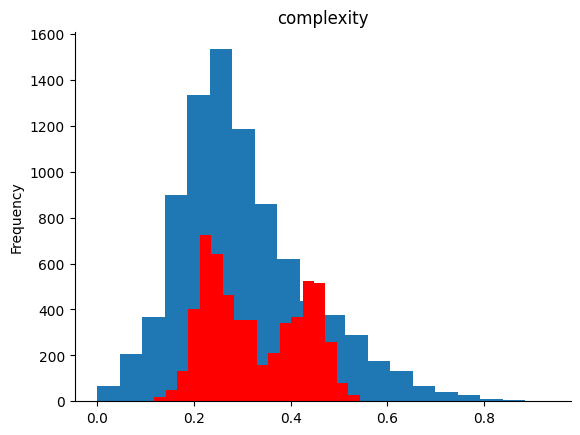

In [ ]:
predictions = model.predict(X_test)

#predictions = model.predict(X_train)
# pretty low, eh?
train['complexity'].plot(kind='hist', bins=20, title='complexity')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.hist(predictions, bins=20, color="red")
plt.show()


submission = pd.DataFrame({'cur_id': test.cur_id.values, 'complexity': predictions})
submission.to_csv('submission.csv', index=False)

### TODO
- implement more features, use external corpora
- try wordfreq library, which languages does it have?
- do a train-valid-test split
- evaluate each individual feature against the true labels
- introduce more features, try to discover which ones help and which ones do not help the predictor
- train a separate model on each language individually and predict on separate languages
- measure individual evaluation such as pearsonr and r2 metric
- measure correlations per individual language, check which language is worst
- use plotly to generate scatter plots of your featurized data (if more than 3 features, use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the dimensionality of the data
- test different models that you are familiar with: KNN, NaiveBayes, LogisticRegression, clustering, SVM, LinearRegression; beware this is a regression task, not a classification task
